## 1. Importation des modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api
from scipy.stats import chi2_contingency
%matplotlib inline
import matplotlib.pyplot as plt

## 2. Importation des données

In [2]:
game_sales=pd.read_csv("vgsales.csv")
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 3. Affichage des informations du jeu de données

In [3]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 4. Recherche des données manquantes

In [4]:
game_sales.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### On retrouve 271 données manquantes pour la variable 'Year' et 58 données manquantes pour la varibale 'Publisher'

## 5. Affichage des données manquantes en pourcentage

In [5]:
game_sales.isnull().mean()*100

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

####  Le pourcentage des données manquantes de 'Year' est de 1,63 % et de 0,34% pour 'Publisher' pour 16598 entrées. Nous avons décidé de supprimer les données manquantes de 'Publisher' et de remplacer les données manquantes de 'Year' par la valeur la plus fréquente.

## 6. Representation graphique des valeurs manquantes

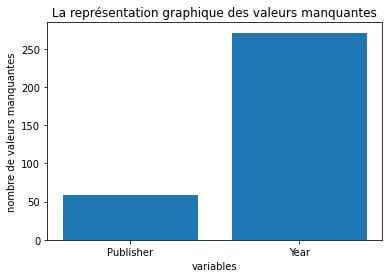

In [6]:
variables = ["Publisher","Year"]
vm = [58,271]
plt.bar(variables,vm,)
plt.xlabel("variables")
plt.ylabel("nombre de valeurs manquantes")
plt.title("La représentation graphique des valeurs manquantes");

## 7.Suppression des données manquantes de la variable 'Publisher'

In [7]:
game_sales=game_sales.dropna(subset=["Publisher"])


In [8]:
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            249
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Le pourcentage étant très faible, nous avons décidé de supprimer les valeurs manquantes de cette variable.

## 8. Remplacement des données manquantes de la variable 'Year'

In [9]:
game_sales['Year'].fillna(game_sales['Year'].mode()[0],inplace=True)

C:\Users\colin\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
game_sales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

#### Le pourcentage de valeurs manquantes étant 5 fois plus élevé, nous pensons qu'il est plus judicieux de les remplacer par la valeur la plus fréquente.


## 9. Changement du type de la variable 'Year' en nombre entier. 

In [11]:
game_sales['Year'] = game_sales['Year'].astype("int64")

<ipython-input-11-d102116e0e25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_sales['Year'] = game_sales['Year'].astype("int64")


In [12]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


## 10.Redéfinition de l'index par la variable 'Rank'

In [13]:
game_sales.set_index('Rank',inplace=True)

## 11. Regroupement des valeurs de la variable 'Genre'

In [14]:
print(game_sales["Genre"].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [15]:
game_sales["Genre"].replace({"Shooter":"Action",
                         "Fighting":"Action",
                         "Puzzle" : "Strategy",
                         "Platform" : "Adventure",
                        "Role-Playing" : "Adventure"}, inplace=True)
print(game_sales["Genre"].unique())

['Sports' 'Adventure' 'Racing' 'Strategy' 'Misc' 'Action' 'Simulation']


C:\Users\colin\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Nous avons décidé de regrouper certaines valeurs qui se ressemblent. Nous considérons les jeux du genre "shooter" et "fighting" comme des jeux dits "Action" ; Les jeux du genre "puzzle" comme des jeux de "Strategy" et les jeux du genre "Platform" comme des jeux dits "Adventure".

## 12. Distribution et étendue des valeurs quantitatives

In [16]:
game_sales.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,2006.444619,0.265079,0.146883,0.077998,0.048191,0.538426
std,5.796957,0.817929,0.506129,0.309800,0.188879,1.557424
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


 1. Le nombre de ventes en Amérique du Nord représente la moitié du nombre de ventes globales enregistrées.
 
 2. Les ventes de la variable 'JP_Sales' représente un seul pays : le Japon. Ces ventes sont presque identiques aux ventes qui représentent plusieurs pays : 'Other_Sales'. Le nombre de ventes du Japon représente presque un tiers des ventes de la variable 'EU_Sales' : l'Europe, qui contient 27 pays. On peut conclure, à partir des données que nous avons, que la population japonaise achète plus de jeux vidéos par rapport à l'Europe et les autres pays.
 

## 13. Distribution et étendue des valeurs qualitatives 

In [17]:
game_sales['Genre'].value_counts(normalize=1)*100

Action        33.029021
Adventure     22.079807
Sports        14.165659
Misc          10.350665
Strategy       7.611850
Racing         7.545345
Simulation     5.217654
Name: Genre, dtype: float64

In [18]:
game_sales['Publisher'].value_counts(normalize=1)*100

Electronic Arts                 8.168077
Activision                      5.894800
Namco Bandai Games              5.634825
Ubisoft                         5.568319
Konami Digital Entertainment    5.030230
                                  ...   
Sears                           0.006046
Pony Canyon                     0.006046
Legacy Interactive              0.006046
Giga                            0.006046
CCP                             0.006046
Name: Publisher, Length: 578, dtype: float64

In [19]:
game_sales['Platform'].value_counts(normalize=1)*100

PS2     13.053204
DS      13.035067
PS3      8.016929
Wii      8.004837
X360     7.623942
PSP      7.321644
PS       7.212817
PC       5.767836
XB       4.981862
GBA      4.812576
GC       3.361548
3DS      3.065296
PSV      2.484885
PS4      2.031439
N64      1.928658
SNES     1.444982
XOne     1.287787
SAT      1.045949
WiiU     0.864571
2600     0.804111
NES      0.592503
GB       0.592503
DC       0.314389
GEN      0.163241
NG       0.072551
WS       0.036276
SCD      0.036276
3DO      0.018138
TG16     0.012092
PCFX     0.006046
GG       0.006046
Name: Platform, dtype: float64

In [20]:
game_sales['Name'].value_counts(normalize=1)*100

Need for Speed: Most Wanted             0.072551
Madden NFL 07                           0.054414
LEGO Marvel Super Heroes                0.054414
Ratatouille                             0.054414
FIFA 14                                 0.054414
                                          ...   
WipEout 3                               0.006046
Road Trip                               0.006046
Tiger & Bunny: Hero's Day               0.006046
Galaxy Angel II: Eigou Kaiki no Koku    0.006046
Medieval Moves: Deadmund's Quest        0.006046
Name: Name, Length: 11442, dtype: float64

## 14. Corrélation des variables quantitatives

In [21]:
game_sales.corr()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,1.000000,-0.091264,0.005352,-0.170172,0.040468,-0.075147
NA_Sales,-0.091264,1.000000,0.767672,0.449864,0.634651,0.941036
EU_Sales,0.005352,0.767672,1.000000,0.435658,0.726326,0.902817
JP_Sales,-0.170172,0.449864,0.435658,1.000000,0.290150,0.611893
Other_Sales,0.040468,0.634651,0.726326,0.290150,1.000000,0.748260
Global_Sales,-0.075147,0.941036,0.902817,0.611893,0.748260,1.000000


Les variables de ventes sont toutes corrélées positivement.
On considère les coefficients compris entre 0.5 et 1 expriment une corrélation positive et forte.
Les coefficients compris entre 0 et 0.5 expriment une corrélation positive et faible.

Les variables NA_Sales, EU_Sales et Other_Sales sont toutes corrélées fortement et positivement entres-elles. 
Cependant, la corrélation entre JP_Sales et ces dernières est positivement faible.
En revanche, toutes les variables de ventes sont corrélées fortement et positivement avec Global_Sales.

Concernant la variable "Year", nous constatons que les coefficients se rapprochent de zéro, nous pouvons en conclure qu'il n'y a pas de corrélation avec les variables ventes.

## 15. Corrélation entre les variables quantitatives et les variables qualitatives avec la méthode ANOVA

#### 15.1) Corrélation entre la variable "Year" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [22]:
Dep_Y = statsmodels.formula.api.ols('Year ~ Platform', data=game_sales).fit()
result_Y = statsmodels.api.stats.anova_lm(Dep_Y)

result_Y

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,460333.741069,15344.458036,2653.846367,0.0
Residual,16509.0,95454.530031,5.781969,NaN,NaN


In [23]:
Dep_Y1 = statsmodels.formula.api.ols('Year ~ Genre', data=game_sales).fit()
result_Y1 = statsmodels.api.stats.anova_lm(Dep_Y1)

result_Y1

,df,sum_sq,mean_sq,F,PR(>F)
Genre,6.0,9008.555498,1501.425916,45.398675,1.960789e-55
Residual,16533.0,546779.715603,33.072021,NaN,NaN


In [24]:
Dep_Y2 = statsmodels.formula.api.ols('Year ~ Publisher', data=game_sales).fit()
result_Y2 = statsmodels.api.stats.anova_lm(Dep_Y2)

result_Y2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,205447.559463,356.061628,16.222653,0.0
Residual,15962.0,350340.711637,21.948422,NaN,NaN


In [25]:
#Dep_Y3 = statsmodels.formula.api.ols('Year ~ Name', data=game_sales).fit()
#result_Y3 = statsmodels.api.stats.anova_lm(Dep_Y3)

#result_Y3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "Year" et les autres variables qualitatives

#### 15.2) Corrélation entre la variable "Na_Sales" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [25]:
Dep_NA = statsmodels.formula.api.ols('NA_Sales ~ Platform', data=game_sales).fit()
resultNA = statsmodels.api.stats.anova_lm(Dep_NA)

resultNA

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,423.103513,14.103450,21.87957,1.998317e-116
Residual,16509.0,10641.610683,0.644595,NaN,NaN


In [27]:
Dep_NA1 = statsmodels.formula.api.ols('NA_Sales ~ Genre', data=game_sales).fit()
result_NA1 = statsmodels.api.stats.anova_lm(Dep_NA1)
result_NA1

,df,sum_sq,mean_sq,F,PR(>F)
Genre,7.0,35.150120,5.021446,7.526548,4.426029e-09
Residual,16532.0,11029.564076,0.667165,NaN,NaN


In [26]:
Dep_NA2 = statsmodels.formula.api.ols('NA_Sales ~ Publisher', data=game_sales).fit()
result_NA2 = statsmodels.api.stats.anova_lm(Dep_NA2)

result_NA2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,1093.020669,1.894317,3.032291,1.196239e-109
Residual,15962.0,9971.693527,0.624715,NaN,NaN


In [29]:
#Dep_NA3 = statsmodels.formula.api.ols('NA_Sales ~ Name', data=game_sales).fit()
#result_NA3 = statsmodels.api.stats.anova_lm(Dep_NA3)
#result_NA3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "NA_Sales" et les autres variables qualitatives

#### 15.3) Corrélation entre la variable "EU_Sales" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [27]:
Dep_EU = statsmodels.formula.api.ols('EU_Sales ~ Platform', data=game_sales).fit()
result_EU = statsmodels.api.stats.anova_lm(Dep_EU)

result_EU

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,98.472694,3.282423,13.094742,5.664941e-64
Residual,16509.0,4138.265741,0.250667,NaN,NaN


In [28]:
Dep_EU1 = statsmodels.formula.api.ols('EU_Sales ~ Genre', data=game_sales).fit()
result_EU1 = statsmodels.api.stats.anova_lm(Dep_EU1)

result_EU1

,df,sum_sq,mean_sq,F,PR(>F)
Genre,6.0,15.465339,2.577556,10.095234,3.615800e-11
Residual,16533.0,4221.273096,0.255324,NaN,NaN


In [32]:
Dep_EU2 = statsmodels.formula.api.ols('EU_Sales ~ Publisher', data=game_sales).fit()
result_EU2 = statsmodels.api.stats.anova_lm(Dep_EU2)

result_EU2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,316.027474,0.547708,2.229829,8.031554e-53
Residual,15962.0,3920.710961,0.245628,NaN,NaN


In [33]:
#Dep_EU3 = statsmodels.formula.api.ols('EU_Sales ~ Name', data=game_sales).fit()
#result_EU3 = statsmodels.api.stats.anova_lm(Dep_EU3)

#result_EU3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "EU_Sales" et les autres variables qualitatives

#### 15.4) Corrélation entre la variable "JP_Sales" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [29]:
Dep_JP = statsmodels.formula.api.ols('JP_Sales ~ Platform', data=game_sales).fit()
result_JP = statsmodels.api.stats.anova_lm(Dep_JP)

result_JP

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,219.51885,7.317295,88.316197,0.0
Residual,16509.0,1367.82637,0.082853,NaN,NaN


In [30]:
Dep_JP1 = statsmodels.formula.api.ols('JP_Sales ~ Genre', data=game_sales).fit()
result_JP1 = statsmodels.api.stats.anova_lm(Dep_JP)

result_JP1

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,219.51885,7.317295,88.316197,0.0
Residual,16509.0,1367.82637,0.082853,NaN,NaN


In [31]:
Dep_JP2 = statsmodels.formula.api.ols('JP_Sales ~ Publisher', data=game_sales).fit()
result_JP2 = statsmodels.api.stats.anova_lm(Dep_JP2)

result_JP2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,361.531088,0.626570,8.158917,0.0
Residual,15962.0,1225.814132,0.076796,NaN,NaN


In [37]:
#Dep_JP3 = statsmodels.formula.api.ols('JP_Sales ~ Name', data=game_sales).fit()
#result_JP3 = statsmodels.api.stats.anova_lm(Dep_JP3)

#result_JP3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "JP_Sales" et les autres variables qualitatives

#### 15.5) Corrélation entre la variable "Other_Sales" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [32]:
Dep_O = statsmodels.formula.api.ols('Other_Sales ~ Platform', data=game_sales).fit()
result_O = statsmodels.api.stats.anova_lm(Dep_O)

result_O

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,18.324164,0.610805,17.638025,5.174841e-91
Residual,16509.0,571.707312,0.034630,NaN,NaN


In [39]:
Dep_O1 = statsmodels.formula.api.ols('Other_Sales ~ Genre', data=game_sales).fit()
result_O1 = statsmodels.api.stats.anova_lm(Dep_O1)

result_O1

,df,sum_sq,mean_sq,F,PR(>F)
Genre,7.0,3.084245,0.440606,12.410153,6.001741e-16
Residual,16532.0,586.947232,0.035504,NaN,NaN


In [33]:
Dep_O2 = statsmodels.formula.api.ols('Other_Sales ~ Publisher', data=game_sales).fit()
result_O2 = statsmodels.api.stats.anova_lm(Dep_O2)

result_O2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,28.225875,0.048918,1.389866,3.229213e-09
Residual,15962.0,561.805602,0.035196,NaN,NaN


In [41]:
#Dep_O3 = statsmodels.formula.api.ols('Other_Sales ~ Name', data=game_sales).fit()
#result_O3 = statsmodels.api.stats.anova_lm(Dep_O3)

#result_O3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "Other_Sales" et les autres variables qualitatives

#### 15.6) Corrélation entre la variable "Global_Sales" et les variables qualitatives : "Platform", "Genre", "Publisher" et "Name"

In [34]:
Dep_G = statsmodels.formula.api.ols('Global_Sales ~ Platform', data=game_sales).fit()
result_G = statsmodels.api.stats.anova_lm(Dep_G)

result_G

,df,sum_sq,mean_sq,F,PR(>F)
Platform,30.0,1447.579997,48.252667,20.600621,9.358994e-109
Residual,16509.0,38668.896207,2.342292,NaN,NaN


In [35]:
Dep_G1 = statsmodels.formula.api.ols('Global_Sales ~ Genre', data=game_sales).fit()
result_G1 = statsmodels.api.stats.anova_lm(Dep_G1)

result_G1

,df,sum_sq,mean_sq,F,PR(>F)
Genre,6.0,88.111088,14.685181,6.065451,0.000002
Residual,16533.0,40028.365115,2.421119,NaN,NaN


In [36]:
Dep_G2 = statsmodels.formula.api.ols('Global_Sales ~ Publisher', data=game_sales).fit()
result_G2 = statsmodels.api.stats.anova_lm(Dep_G2)

result_G2

,df,sum_sq,mean_sq,F,PR(>F)
Publisher,577.0,4392.742853,7.613073,3.401656,2.852573e-138
Residual,15962.0,35723.733350,2.238049,NaN,NaN


In [45]:
#Dep_G3 = statsmodels.formula.api.ols('Global_Sales ~ Name', data=game_sales).fit()
#result_G3 = statsmodels.api.stats.anova_lm(Dep_G3)

#result_G3
#Le code rame trop longtemps et fait bugué le notebook

Au vue des résultats, nous pouvons conclure qu'il n'y a pas de corrélation entre la variable "Global_Sales" et les autres variables qualitatives

Les variables continues et les variables catégorielles sont indépendantes les unes des autres.

## 16. Corrélation des variables qualitatives (test de khi2)

#### 16.1) Corrélation entre "Name" et "Platform"

In [37]:
# H0 : La proportion du nombre de jeu est indépendante du nombre de console
# Ha : La proportion du nombre de jeu est associé du nombre de console 
table =pd.crosstab(game_sales["Name"], game_sales["Platform"])
test=chi2_contingency(table)
statistique = test[0]
pvalue=test[1]
degre = test[2]
print(statistique, pvalue, degre)

377489.75789956166 0.0 343230


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

#### 16.2) Corrélation entre "Name" et "Genre"

In [38]:
# H0 : La proportion du nombre de jeu est indépendante du nombre de genre
# Ha : La proportion du nombre de jeu est associé au nombre de genre
table1 =pd.crosstab(game_sales["Name"], game_sales["Genre"])
test1=chi2_contingency(table1)
statistique = test1[0]
pvalue=test1[1]
degre = test1[2]
print(statistique, pvalue, degre)


99207.74843220272 0.0 68646


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

#### 16.3) Corrélation entre "Name" et "Publisher"

In [39]:
# H0 : La proportion du nombre de jeu est indépendante du nombre de studio
# Ha : La proportion du nombre de jeu est associé au nombre de studio
table2 =pd.crosstab(game_sales["Name"], game_sales["Publisher"])
test2=chi2_contingency(table2)
statistique = test2[0]
pvalue=test2[1]
degre = test2[2]
print(statistique, pvalue, degre)

9110044.808822475 0.0 6601457


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

#### 16.4) Corrélation entre "Platform" et "Genre"

In [40]:
# H0 : La proportion du nombre de console est indépendante du nombre de genre
# Ha : La proportion du nombre de console est associé au nombre de genre 
table3 =pd.crosstab(game_sales["Platform"], game_sales["Genre"])
test3=chi2_contingency(table)
statistique = test3[0]
pvalue=test3[1]
degre = test3[2]
print(statistique, pvalue, degre)

377489.75789956166 0.0 343230


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

#### 16.5) Corrélation entre "Platform" et "Publisher"

In [41]:
# H0 : La proportion du nombre de console est indépendante du nombre de studio
# Ha : La proportion du nombre de console est associé au nombre de studio 
table4 =pd.crosstab(game_sales["Platform"], game_sales["Publisher"])
test4=chi2_contingency(table)
statistique = test4[0]
pvalue=test4[1]
degre = test4[2]
print(statistique, pvalue, degre)

377489.75789956166 0.0 343230


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

#### 16.6) Corrélation entre "Genre" et "Publisher"

In [42]:
# H0 : La proportion de genre est indépendante du nombre de studio
# Ha : La proportion de genre est associé au nombre de studio
table4=pd.crosstab(game_sales["Genre"], game_sales["Publisher"])
test4=chi2_contingency(table)
statistique = test4[0]
pvalue=test4[1]
degre = test4[2]
print(statistique, pvalue, degre)

377489.75789956166 0.0 343230


La pvalue est inférieur à 0.05 donc il n'y a pas de lien entre les deux variables

Les variables catégorielles sont indépendantes entres-elles.

## 17. Fichier nettoyé

In [43]:
game_sales.to_csv("vgsales_clean.csv", index=False)

In [44]:
new_gs = pd.read_csv("vgsales_clean.csv")
new_gs

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Adventure,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16535,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01
16536,Men in Black II: Alien Escape,GC,2003,Action,Infogrames,0.01,0.00,0.00,0.00,0.01
16537,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16538,Know How 2,DS,2010,Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01
